## <center>Advance Feature Engineering in Python</center> 
##### Brief Introduction to Feature Engineering
- Feature engineering is a crucial step in the machine learning pipeline that involves selecting, creating, and transforming features to improve model performance.

- Feature engineering is the process of selecting, creating, and transforming features used in machine learning models. It is a crucial step in building accurate and  effective models as the quality of the features used in building a model has a significant impact on its performance.

- Features are the input variables used by machine learning models to make predictions. They are a representation of the characteristics of the data and can include anything from numerical data like age, height, and weight to categorical data like gender, location, and profession. The selection of the right features is crucial to the success of any machine learning model.

##### Importance of feature engineering
- Feature engineering is important because not all features are equally important or relevant to a model's performance. Some features may not provide any useful information, while others may be redundant or highly correlated with each other. The goal of feature engineering is to select or create the most relevant and informative features while minimizing redundancy and noise.

- Effective feature engineering can help improve model performance by reducing overfitting, increasing accuracy, improving interpretability, increase model complexity, and compute requirements.

- It can also help to identify relationships and patterns in the data that may not be apparent at first glance, leading to new insights and discoveries.


##### NOTE:
- Feature engineering is **not a one-size-fits-all** process; it requires **domain knowledge**, creativity, and experimentation. It is an iterative process that involves continuously refining and improving the features used in a model until the desired level of accuracy and performance is achieved.

- It can also be argued that feature engineering is the most critical part of building a successful machine learning model, and that the success of a model is often determined by the quality of its features.

### Minimal Data Processing

In [1]:
## Read in data
import pandas as pd

train_data = pd.read_csv("/home/samuel/Documents/IPYNB Codes/Competiton/data.csv")
train_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
train_data.shape

(11914, 16)

In [3]:
## Some data preprocessing
## manufacturer's suggested retail price
train_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
### Function for categorical encoding

import copy
from typing import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.feature_extraction import FeatureHasher

%matplotlib inline

def hash_categorical_features(df: pd.DataFrame, cat_columns: List[str], n_features=50) -> pd.DataFrame:


    # Separate the categorical features to be encoded
    categorical_features = df[cat_columns]  # Replace with your categorical feature names

    # Apply the hashing trick using FeatureHasher
    hasher = FeatureHasher(n_features=n_features, input_type='string')  # Set the desired number of output features
    hashed_features = hasher.transform(categorical_features.values.astype(str))

    # Convert the hashed features into a pandas DataFrame
    hashed_df = pd.DataFrame.sparse.from_spmatrix(hashed_features)

    # Concatenate the hashed features with the original dataset
    df_encoded = pd.concat([df, hashed_df], axis=1)

    return df_encoded

def label_encoder(df: pd.DataFrame, cat_columns: List[str]):

    categorical_features = df[cat_columns]  # Replace with your categorical feature names

    # Apply label encoding to each categorical feature
    label_encoder = LabelEncoder()
    encoded_features = categorical_features.apply(label_encoder.fit_transform)

    # Replace the original categorical features with the encoded features in the DataFrame
    df_encoded = df.copy()
    df_encoded[cat_columns] = encoded_features  

    return df_encoded


In [5]:
# manufacturer's suggested retail price
Y = train_data["MSRP"]
train_data.drop(["MSRP"], axis=1, inplace=True)
len (train_data.columns)

15

In [4]:
train_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [6]:
# Encode categorical variables
cat_columns = [cols for cols in train_data.columns if train_data[cols].dtype == "object"]
#hash_encoded_df = hash_categorical_features(train_data, cat_columns, n_features=30)
label_encoded_df = label_encoder(train_data, cat_columns)
label_encoded_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916


In [7]:
# Impute missing data
columns_with_null = list(label_encoded_df.columns[label_encoded_df.isnull().any()])
print(columns_with_null)

['Engine HP', 'Engine Cylinders', 'Number of Doors']


In [11]:
# Use a simple imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = copy.deepcopy(label_encoded_df)  # Create a copy of the DataFrame
df_imputed[columns_with_null] = imputer.fit_transform(df_imputed[columns_with_null])

list(df_imputed.columns[df_imputed.isnull().any()]) # verify if there's not any missing data

[]

In [12]:
df_imputed.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916


In [25]:
#max(df_imputed["Engine HP"])
#max(df_imputed["Year"])
max(df_imputed["Popularity"])
min(df_imputed["Popularity"])

2

In [13]:
# scale dataframe
scaler = StandardScaler()
columns_to_scale = list(df_imputed.columns)
scaled_df = copy.deepcopy(df_imputed)
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])

scaled_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,-1.321914,-1.705832,0.081228,0.003874,0.787819,0.212216,1.67567,1.152896,-1.629715,-0.544019,-1.105198,-0.072270,-0.071930,-0.081587,1.637604
1,-1.321914,-1.709546,0.081228,0.003874,0.466453,0.212216,1.67567,1.152896,-1.629715,0.678266,-1.105198,-0.479182,0.153737,-0.081587,1.637604
2,-1.321914,-1.709546,0.081228,0.003874,0.466453,0.212216,1.67567,1.152896,-1.629715,0.551823,-1.105198,-0.072270,0.153737,0.029680,1.637604
3,-1.321914,-1.709546,0.081228,0.003874,-0.176280,0.212216,1.67567,1.152896,-1.629715,0.678266,-1.105198,-0.072270,0.153737,-0.192853,1.637604
4,-1.321914,-1.709546,0.081228,0.003874,-0.176280,0.212216,1.67567,1.152896,-1.629715,0.509675,-1.105198,-0.479182,0.153737,-0.192853,1.637604


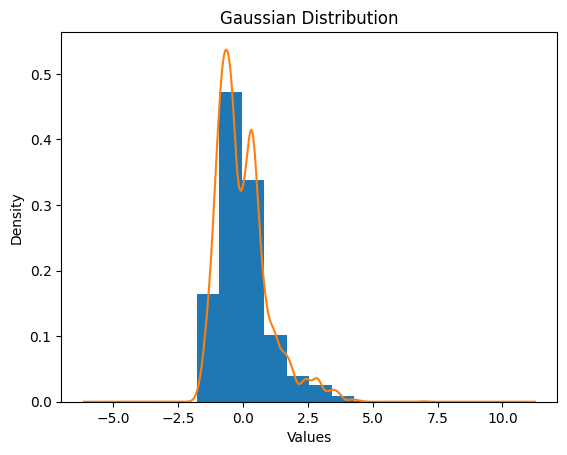

In [21]:
# View the scaled normal distribution
fig, ax = plt.subplots()

# Plot the Gaussian distribution
scaled_df['Engine HP'].plot(kind='hist', density=True, ax=ax)  # Plot histogram
scaled_df['Engine HP'].plot(kind='kde', ax=ax)  # Plot kernel density estimate

# Set labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.set_title('Gaussian Distribution')

# Show the plot
plt.show()


In [14]:
### Base model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(scaled_df, Y, test_size=0.3, random_state=42)
RF_model.fit(X_train, Y_train)

Y_pred = RF_model.predict(X_val)
mse = mean_squared_error(Y_val, Y_pred, squared=False)
print (mse)



9547.177985885179


### Feature Selection Techniques
- Feature selection is the process of selecting the most relevant features from a dataset for use in machine learning models. The goal of feature selection is to reduce the dimensionality of the data and eliminate irrelevant or redundant features that may negatively impact model performance.

##### NOTE:
- When selecting features, it's important to keep the end goal in mind and consider the specific requirements of the model being developed. For example, if the model requires interpretability, then selecting features that are easy to understand and explain may be more important than selecting features that improve model performance.

- Each of these methods has its own strengths and weaknesses, and the choice of method will depend on the specific requirements of the model being developed and the characteristics of the dataset. Ultimately, the most effective feature selection approach will depend on the specific problem being addressed, and the best approach is often determined through experimentation and testing.


##### Univarite Feature Selection
- Univariate selection is a common feature selection technique, which involves selecting features based on their statistical significance with the target variable. This technique involves  calculating the correlation between each feature and the target variable and selecting the most significant features based on a predetermined threshold.

Commonly used univarite feature selection techniques:

- Pearson's Correlation Coefficient
- Chi-Square Test
- ANOVA (Analysis of Variance)
- Fisher Score
- L1 Regularization (Lasso)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2

"""
Score Fucntions:
  -  f_classif: ANOVA F-value between label/feature for classification tasks.
  -  mutual_info_classif: Mutual information for a discrete target.
  -  chi2: Chi-squared stats of non-negative features for classification tasks.
  -  f_regression: F-value between label/feature for regression tasks.
  -  mutual_info_regression: Mutual information for a continuous target.
  -  SelectPercentile: Select features based on percentile of the highest scores.
  -  SelectFpr : Select features based on a false positive rate test.
  -  SelectFdr : Select features based on an estimated false discovery rate.
  -  SelectFwe : Select features based on family-wise error rate.
  -  GenericUnivariateSelect : Univariate feature selector with configurable mode.
"""

# Use SelectKBest with f_regression to calculate Pearson correlation coefficients
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = selector.fit_transform(df_imputed, Y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = df_imputed.columns[selected_indices]

# Print the selected feature names and their corresponding scores
for feature, score in zip(selected_features, selector.scores_[selected_indices]):
    print("Feature:", feature, ", Score:", score)


Feature: Year , Score: 650.7105543979424
Feature: Engine HP , Score: 9242.201044156815
Feature: Engine Cylinders , Score: 4640.101550598123
Feature: Transmission Type , Score: 406.8965630347885
Feature: Market Category , Score: 409.46292922357696


##### Feature Importance
 - Feature importance is another technique used for feature selection, which involves determining the relative importance of each feature in a dataset. This technique involves training a model on the full set of features and calculating the contribution of each feature to the model's performance. This can be done with models such as RandomForest, XGBoost, LGB, e.t.c

In [15]:
# Feature importance from smaple model we built prior
feature_importance = RF_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': train_data.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score (descending order)
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df[:5]

,Feature,Importance
4,Engine HP,0.403010
5,Engine Cylinders,0.330100
13,city mpg,0.050387
1,Model,0.041962
2,Year,0.037350


##### Correlation Matrix
- Correlation matrix is another technique for feature selection that involves calculating the correlation between features and removing highly correlated features. Correlated features can lead to redundancy and negatively impact model performance.

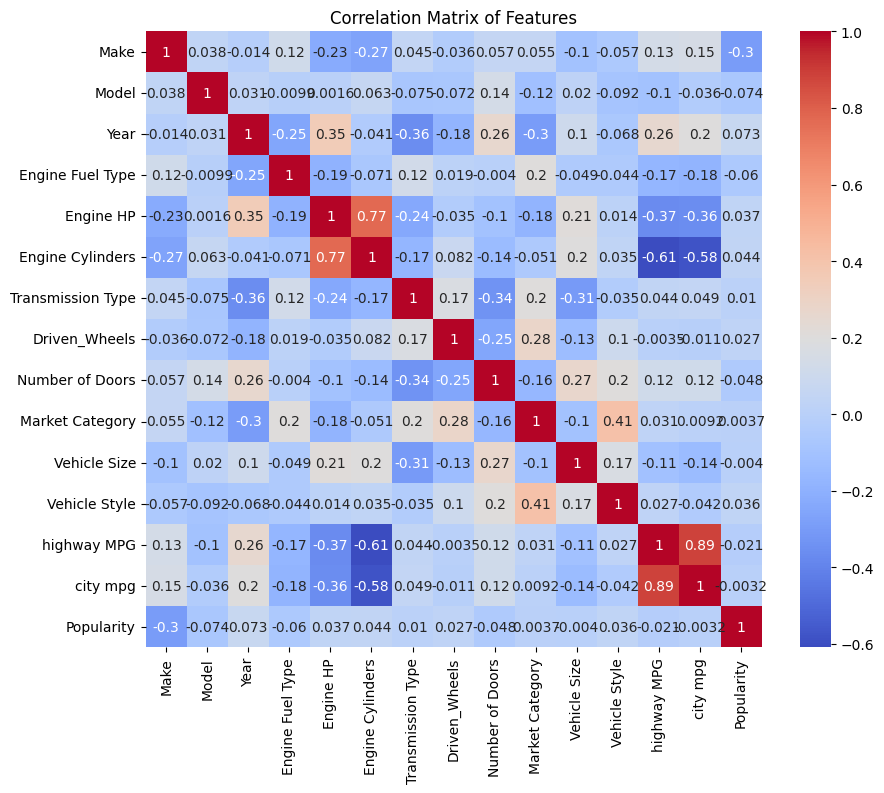

In [19]:
# Calculate the correlation matrix
corr_matrix = df_imputed.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix of Features')
plt.show()

##### Recursive Feature Elimination (RFE)

- Recursive Feature Elimination (RFE) is a specific implementation of a wrapper method. It starts with all the features and recursively eliminates the least important features based on their coefficients or importance scores. It uses an estimator (such as a machine learning model) to rank the features and eliminates the least significant ones iteratively until a specified number of features is reached. RFE provides a feature ranking based on their importance, which can be useful for feature selection.


In [17]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression() 
rfe_selector = RFE(estimator, n_features_to_select=5) # Recursive Feature Elimination

rfe_selector.fit(df_imputed, Y)

#rfe_selector.fit(df_imputed, Y)
#selected_features = df_imputed.columns[rfe_selector.support_]
#print (selected_features)

# Get the selected feature indices
selected_feature_indices = rfe_selector.get_support(indices=True)
selected_feature_names = df_imputed.columns[selected_feature_indices]
print(f"Selected Features: \n{list(selected_feature_names)}")

Selected Features: 
['Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Vehicle Size']


### Feature Creation Technique

- Feature creation, is the process of creating new features from existing data to improve the performance of machine learning models. Feature creation involves transforming the raw data into a form that is more meaningful for the model, making it easier for the model to learn patterns and make accurate predictions. There are several techniques available for feature creation:

    - Feature scaling: it's a very common technique, which involves scaling the features so that they have similar ranges. This technique can be particularly useful when working with data that has features with vastly different scales, such as year and number of doors.
    
#### NOTE:
- When creating new features, it's important to consider the impact on model performance and to avoid creating features that are highly correlated or redundant. 


LECTURE TIME NOTE:
One of the reasons why we scale is because having differnt scales can lead to one feature dominating the learning algorithm and model analysis. Also it helps converge faster when using gradient descent algoritm. Treee based model such as Random forest and decision tree are invariant to feature scalling

##### Log Transformation
- Log transformation involves taking the logarithm of a feature. It can be particularly useful when working with features that have a skewed distribution or when dealing with data that has large ranges. Considering our dataset taht includes Engine HP, Popularity, which are in large range and are heavily skewed towards higher values. Taking the logarithm of the data can help to reduce the impact outliers and bring the data closer to a normal distribution making the data more suitable for use in a machine learning model.


In [26]:
#columns_to_transform = ['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', "Year"]
#df_imputed[columns_to_transform] = df_imputed[columns_to_transform].apply(np.log)
log_df = df_imputed.apply(np.log)

log_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,1.386294,0.0,7.606387,2.079442,5.814131,1.791759,1.098612,1.098612,0.693147,3.637586,-inf,2.079442,3.258097,2.944439,8.272826
1,1.386294,-inf,7.606387,2.079442,5.703782,1.791759,1.098612,1.098612,0.693147,4.204693,-inf,1.791759,3.332205,2.944439,8.272826
2,1.386294,-inf,7.606387,2.079442,5.703782,1.791759,1.098612,1.098612,0.693147,4.158883,-inf,2.079442,3.332205,2.995732,8.272826
3,1.386294,-inf,7.606387,2.079442,5.438079,1.791759,1.098612,1.098612,0.693147,4.204693,-inf,2.079442,3.332205,2.890372,8.272826
4,1.386294,-inf,7.606387,2.079442,5.438079,1.791759,1.098612,1.098612,0.693147,4.143135,-inf,1.791759,3.332205,2.890372,8.272826


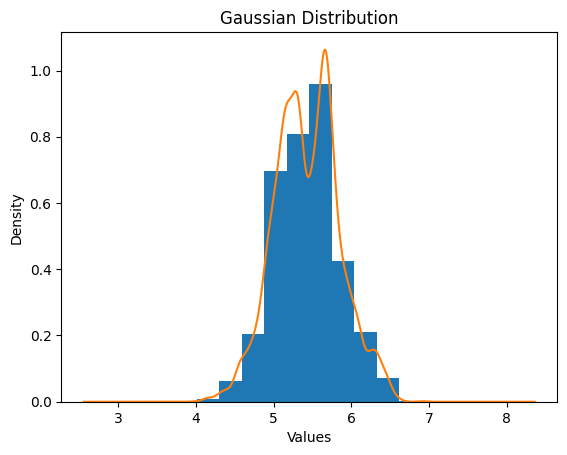

In [27]:
# View the scaled normal distribution
fig, ax = plt.subplots()

# Plot the Gaussian distribution
log_df['Engine HP'].plot(kind='hist', density=True, ax=ax)  # Plot histogram
log_df['Engine HP'].plot(kind='kde', ax=ax)  # Plot kernel density estimate

# Set labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.set_title('Gaussian Distribution')

# Show the plot
plt.show()


##### Feature Interaction
- Features Interaction involve creating new features by combining two or more existing features. This technique can be particularly useful when working with data that has complex interactions between features, 

- A housing campaign may depend on the combination of factors such as age, income, and location. It does make sense to create a new feature with the combination of age, income, and location.

- For our specific dataset, features such as, the Make and the model can intercate. Also, various engine features such as Engine Fuel type, Engine HP and Engine cylinders which can influence the performancs and efficiency of a car can also interact together. 

Again, this is a tricky and iterative process and it's important to consider the impact on model performance and to avoid creating features that are highly correlated or redundant. 


In [30]:
# Using H-Stat to determine each feature strength
# A high H-statistic indicates a strong interaction between variables, suggesting that the relationship between them cannot
# be adequately explained by their individual effects alone. Conversely, a low H-statistic suggests a weaker interaction,
# indicating that the variables may be largely independent. 
# If the interaction between two features is weak, merging them together may not provide much additional information
# or improve the model's performance significantly. 

# In summary, a higher H-statistic indicates a stronger interaction effect between two features, 
# implying that their combination produces a unique outcome that cannot be explained by each feature's individual contribution. 
# On the other hand, a lower H-statistic suggests a weaker or negligible interaction effect, where the combined effect is not 
# substantially different from the sum of the individual effects.

# The H-statistic is the absolute value of the correlation coefficient (corr()) between two features. 
# The abs() function ensures that the interaction strength is measured irrespective of positive or negative correlation. 


h_statistics = {}
num_features = len(df_imputed.columns)

for i in range(num_features):
    for j in range(i + 1, num_features):
        feature_i = df_imputed.iloc[:, i]
        feature_j = df_imputed.iloc[:, j]
        h_statistic = np.abs(feature_i.corr(feature_j))
        feature_pair = (df_imputed.columns[i], df_imputed.columns[j])
        h_statistics[feature_pair] = h_statistic

# Aggregate the H-statistics to measure the overall interaction strength
interaction_strength = sum(h_statistics.values()) / len(h_statistics)

print("Interaction Strength:", interaction_strength)


Interaction Strength: 0.16649024154328257


In [12]:
h_statistics

{('Make', 'Model'): 0.037818934997870535,
 ('Make', 'Year'): 0.013936274364736812,
 ('Make', 'Engine Fuel Type'): 0.11599963113134379,
 ('Make', 'Engine HP'): 0.22715128549110208,
 ('Make', 'Engine Cylinders'): 0.2655655383132701,
 ('Make', 'Transmission Type'): 0.04502177637164989,
 ('Make', 'Driven_Wheels'): 0.035688988445568476,
 ('Make', 'Number of Doors'): 0.0572002246855201,
 ('Make', 'Market Category'): 0.05545302673076793,
 ('Make', 'Vehicle Size'): 0.10226176049649681,
 ('Make', 'Vehicle Style'): 0.057136898446504394,
 ('Make', 'highway MPG'): 0.1332415555623222,
 ('Make', 'city mpg'): 0.15086153055409876,
 ('Make', 'Popularity'): 0.2976514724907273,
 ('Model', 'Year'): 0.03091278385445036,
 ('Model', 'Engine Fuel Type'): 0.009923240693506684,
 ('Model', 'Engine HP'): 0.0015934814393106529,
 ('Model', 'Engine Cylinders'): 0.06349651258888356,
 ('Model', 'Transmission Type'): 0.07497319616842402,
 ('Model', 'Driven_Wheels'): 0.0719198050116704,
 ('Model', 'Number of Doors'): 0.

In [28]:
## Feature interaction between Highway MPG and City MPG
## 'Engine HP', 'Engine Cylinders'
df_imputed["Highway City MPG"] = df_imputed["highway MPG"] + df_imputed["city mpg"]
df_imputed["Engine HP Cylinder"] = df_imputed["Engine HP"] + df_imputed["Engine Cylinders"]
df_imputed["Make Model"] = df_imputed["Make"] + df_imputed["Model"]
df_imputed

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Highway City MPG,Engine HP Cylinder,Make Model
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26,19,3916,45,341.0,5
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28,19,3916,47,306.0,4
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28,20,3916,48,306.0,4
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28,18,3916,46,236.0,4
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28,18,3916,46,236.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204,39,306.0,901
11910,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204,39,306.0,901
11911,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23,16,204,39,306.0,901
11912,0,901,2013,7,300.0,6.0,1,0,4.0,13,2,2,23,16,204,39,306.0,901


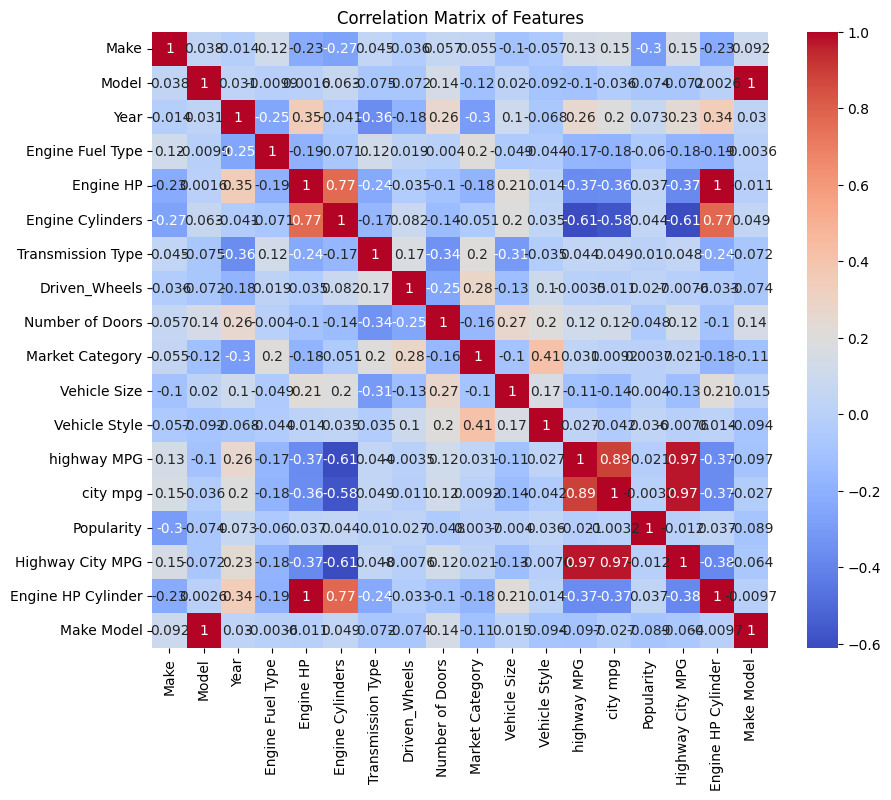

In [29]:
# Calculate the correlation matrix
corr_matrix = df_imputed.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix of Features')
plt.show()

### Handling Missing Data

- Missing data is a common problem in data analysis and can have a significant impact on the accuracy and effectiveness of machine learning models. There are several methods available for handling missing data, each with its own advantages and disadvantages. Here are some of the most common methods:

    - Dropping the missing data points. This is easy to implement but can lead to loss of valuable information.

    - Replacing them with constant values such as -1, 999 etc. Simple but have some drawbacks such as bias, potential for misleading results, distortion of relationships between varialbes which can obsure or eleminate associations etc. It can be acceptable in certain situations where the missingness is truly random, and the proportion of missing data is small.
        
    - Assigning mean, median value of the related column of the dataset. This method assumes that the missing values have a similar distribution as the observed values, potentially introducing bias and underestimating the variance of the imputed feature.

    - Using imputer to fill the missing data points. Such as KNN, Simple Imputer e.t.c

    - Using predictive methods to fill missing data points. This involves building a model based on the observed data and using that model to impute missing values. They can provide more accurate imputations compared to simpler methods like mean imputation, especially when there are complex relationships in the data. 

    - Last Observation Carried Forward (LOCF) or Next Observation Carried Backward (NOCB). These imputation methods involve carrying forward the last observed value or carrying backward the next observed value to fill in missing values. LOCF assumes that the most recent observation is a good estimate of the missing value, while NOCB assumes the next observation is a reasonable substitute. However, these methods may not be suitable if there are significant changes between observations. Can be used in  time series, longitudinal data etc.

Handling missing data is an important step in the machine learning pipeline. The most common methods of handling missing data include deletion and imputation. Each method has its own advantages and disadvantages, and the choice of method should be based on the characteristics of the dataset and the research question being addressed. It's important to carefully consider the impact of handling missing data on model performance and to test and validate the chosen method to ensure that it is appropriate for the data being analyzed.

##### Understanding Missing Data Mechanism

- Missing Completely at Random (MCAR): In this mechanism, the missingness is unrelated to any observed or unobserved variables. The missing values occur randomly throughout the dataset. It is an ideal scenario because the missingness is not biased and does not introduce any systematic effects. A real-world example of MCAR could be a survey where respondents accidentally skip certain questions due to a printing error.

- Missing at Random (MAR): In MAR, the missingness can be explained by observed variables, but not by the missing values themselves. The probability of missingness depends on the observed data, but not on the unobserved data. For example, in a health study, if participants with higher income are more likely to refuse to disclose their income, the missingness of income data is related to the observed variable (income) but not to the missing values (health data). MAR can be handled using techniques like imputation based on observed variables.

- Missing Not at Random (MNAR): MNAR occurs when the missingness is related to the missing values themselves, even after considering the observed data. A real-world example of MNAR could be a survey about job satisfaction, where individuals who are extremely dissatisfied may be less likely to respond. In this case, the missingness is related to the unobserved data (extreme dissatisfaction), and the missingness mechanism is non-ignorable. Handling MNAR requires more sophisticated methods, such as model-based imputation or sensitivity analyses.


### Handling Outliers
- Outliers are data points that are significantly different from the majority of the data in a dataset. Outliers can occur due to a variety of reasons, such as measurement errors, data entry errors, or genuinely unusual observations. In machine learning, outliers can have a significant impact on the performance of a model, particularly for models that are sensitive to extreme values or rely on assumptions of normality or homoscedasticity. Therefore, it is important to identify and handle outliers appropriately. 
    
Handling outliers may depend on the specific application and the characteristics of the data. For example, in finance, outliers in stock prices may be handled differently than outliers in customer data. In healthcare, outliers in medical data may be handled differently than outliers in clinical trial data. It is important to carefully consider the impact of outliers on the application and to choose an appropriate method for handling them.

#### NOTE:
- No, it is not appropriate to deal with outliers in the same way as missing values. Outliers are data points that are significantly different from the majority of the data in a dataset, while missing values are values that are not present in the dataset. Dealing with outliers involves identifying and addressing data points that may have a significant impact on the performance of a machine learning model. On the other hand, dealing with missing values involves filling in the missing values with estimated values, imputed values, or removing the missing values altogether.

- Treating outliers as missing values and filling them in with estimated values may distort the distribution of the data and introduce bias into the model. On the other hand, removing outliers without careful consideration may lead to loss of valuable information and affect the model's ability to generalize to new data.

#### Visulizing Outliers & Statistical Method

- Visualizationand Statistical methods:
Visualizing the data using scatter plots, box plots, and histograms can help identify outliers. Data points that fall outside of the typical range can be visually identified and flagged for further analysis. Statistical methods such as the z-score, IQR (Interquartile Range) method, and Tukey's method can be used to identify outliers. The z-score method involves calculating the number of standard deviations a data point is from the mean, while the IQR and Tukey's methods use the median and quartiles to define the range of typical data points.

In [31]:
## Dealing with Outliers

# For a normal distribution (mean is zero and the standard deviation is 1) dataset, we can use the empherical relationship of the dataset
# The data points which fall below mean-3*(sd) or above mean+3*(sd) are outliers. where mean and sigma are the 
# average value and standard deviation of a particular column.

# For Skewed distributions dataset, use Inter-Quartile Range (IQR) proximity rule (Box Plot).
# The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. where Q1 and Q3 are the 25th and 75th 
# percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

#train_data["Popularity"] > 10
# Defining Interquartile Range
quartile1 = train_data["Popularity"].quantile(0.25)
quartile3 = train_data["Popularity"].quantile(0.75)

interquartile_range = quartile3 - quartile1
upper_limit = quartile3 + 1.5 * interquartile_range
lower_limit = quartile1 - 1.5 * interquartile_range


In [32]:
upper_limit, lower_limit

(4199.0, -1641.0)

In [33]:
#train_data[(train_data["Popularity"] < lower_limit) | (train_data["Popularity"] > upper_limit)].index

# check if there're any datapoint outside our limit
train_data[(train_data["Popularity"] < lower_limit) | (train_data["Popularity"] > upper_limit)].any(axis=None)

True

In [34]:
train_data[(train_data["Popularity"] < lower_limit) | (train_data["Popularity"] > upper_limit)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
1331,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Cargo Minivan,22,16,5657
1332,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,22,15,5657
1333,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Passenger Minivan,18,14,5657
1334,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Passenger Minivan,22,15,5657
1335,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657
11444,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657
11445,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657
11446,Ford,Windstar,2003,regular unleaded,200.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Passenger Minivan,22,16,5657


<AxesSubplot: >

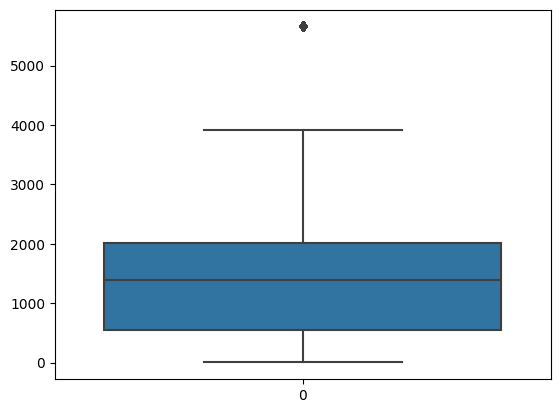

In [35]:
import seaborn as sns
sns.boxplot(train_data["Popularity"])

#### Removing Outliers using Cappinng and Flooring method
- Capping and flooring:
Capping and flooring involves setting a maximum and minimum value for a variable to limit the impact of outliers. This method can be particularly useful when dealing with data that has a natural upper or lower limit, such as income or age.

In [30]:
clean_outliers_df = train_data[~((train_data["Popularity"] < lower_limit) | (train_data["Popularity"] > upper_limit))]
clean_outliers_df.shape

(11033, 15)

In [31]:
clean_outliers_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916


<AxesSubplot: >

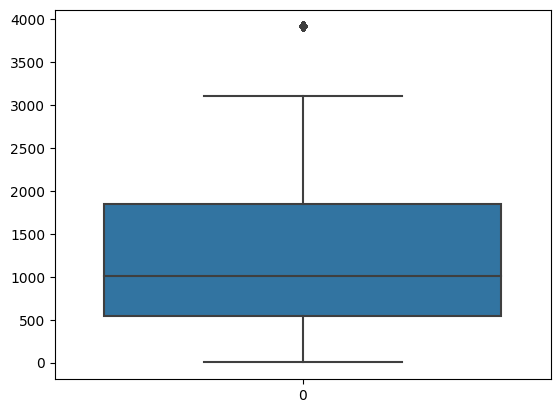

In [32]:
sns.boxplot(clean_outliers_df["Popularity"])

<AxesSubplot: >

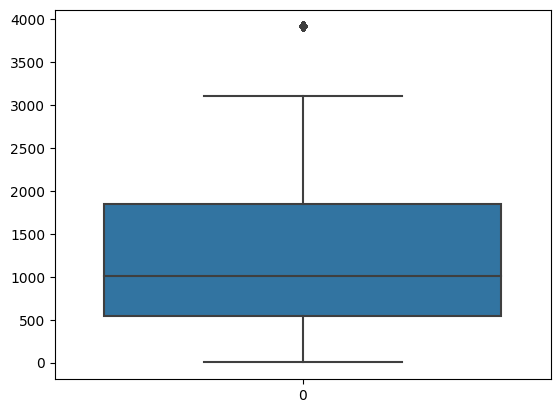

In [28]:
clean_outliers_df.loc[(clean_outliers_df["Popularity"] < lower_limit), "Popularity"] = lower_limit
clean_outliers_df.loc[(clean_outliers_df["Popularity"] > upper_limit), "Popularity"] = upper_limit

sns.boxplot(clean_outliers_df["Popularity"])

In [20]:
train_data.shape
#(881,)

(11914, 16)

#### Winsorization

Winsorization involves replacing extreme values with a less extreme value. For example, the top 1% of values may be replaced with the value at the 99th percentile. This method can help reduce the impact of outliers while retaining the shape of the distribution.


- Merits of Winsorization:

    -Robustness: Winsorization is a robust method, meaning it is less affected by extreme values compared to other outlier handling techniques. It reduces the influence of outliers without completely discarding them.
    
    -Preserves Data Distribution: Winsorization retains the original distribution of the data to a large extent. It replaces extreme values with values from the non-extreme range, maintaining the overall shape of the distribution.
    
    -Simplicity: Winsorization is relatively simple to implement, especially when using built-in functions or libraries that provide winsorization capabilities.
    
    -Retains Sample Size: Unlike removing outliers entirely, winsorization retains the original sample size, allowing for better utilization of the available data.

- Demerits of Winsorization:

    - Information Loss: Winsorization may lead to information loss by reducing the variability in the data. By replacing extreme values, the potential insights or signals associated with those outliers might be distorted or removed.
    
    - Arbitrary Limits: Winsorization involves setting arbitrary limits or thresholds for trimming or replacing values. These limits are often determined based on domain knowledge or heuristics, which might not always be optimal or appropriate for the specific dataset.
    
    - Impact on Statistical Measures: Winsorization affects statistical measures such as means, standard deviations, and correlations. The changes in these measures can impact subsequent analyses and interpretations.
    
    - Assumption of Outlier Symmetry: Winsorization assumes symmetry of outliers, i.e., that extreme values occur equally in both tails of the distribution. This assumption might not hold in all cases, and certain outliers may require different handling approaches.

It's important to consider the characteristics of your data, the specific analysis goals, and the trade-offs between retaining information and mitigating the influence of outliers when deciding whether to use winsorization or other outlier handling techniques. It's recommended to compare and evaluate the results of different approaches to determine the most appropriate method for your dataset and analysis.

<AxesSubplot: >

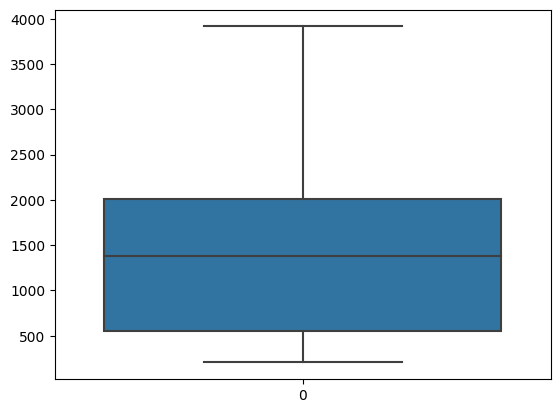

In [36]:
## The limits parameter specifies the fraction of data to be trimmed on both ends. In this case, 
# we set limits=[0.05, 0.05], which trims 5% of the data on both the lower and upper ends.
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import FunctionTransformer

train_data["winsorized_popularity"] = mstats.winsorize(train_data["Popularity"], limits=[0.1, 0.1]) # trim 10% at both ends
sns.boxplot(train_data["winsorized_popularity"])

In [34]:
train_data.shape

(11914, 16)

In [ ]:
def winsorize_data(x):
    lower_limit = np.percentile(x, 5)
    upper_limit = np.percentile(x, 95)
    x_clipped = np.clip(x, lower_limit, upper_limit)
    return x_clipped

# Apply winsorization using FunctionTransformer
transformer = FunctionTransformer(winsorize_data)
winsorized_outliers = transformer.transform(train_data["Popularity"].values.reshape(-1, 1)).flatten()

### Dimensionality Reduction
The questions that we need to ask at this point are:
- Are all the features really contributing to decision making?
- Is there a way to come to the same conclusion using a lesser number of features?
- Is there a way to combine features to create a new feature and drop the old ones?
- Is there a way to remodel features in a way to make them visually comprehensible?

#### Dimensionality Reduction (The Curse of Dimensionality)

- Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution, as we will see. This problem is often referred to as the curse of dimensionality.

- Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it willspeed up training, it may also make your system perform slightly worse. So you should first try to train your system with the original data before considering using dimensionality reduction if training is too slow. In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training).

- Apart from speeding up training, dimensionality reduction is also extremely useful for data visualization . Reducing the number of dimensions down to two (or three) makes it possible to plot a highdimensional training set on a graph and often gain some important insights by visually detecting patterns, such as clusters.

- It reduces the size of the space in which the distances are calculated, thereby improving machine learning algorithm performance. It reduces the degrees of freedom for our dataset avoiding chances of overfitting. Reducing the dimensionality using dimensionality reduction techniques can simplify the dataset facilitating a better description, visualisation, and insight.

The two common method for performing dimensionality reduction are: **PCA** and **t-SNE** (T-distributed Stochastic Neighbourhood Embedding)

PCA

The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace This results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

What are the principal components? 
Principal components are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

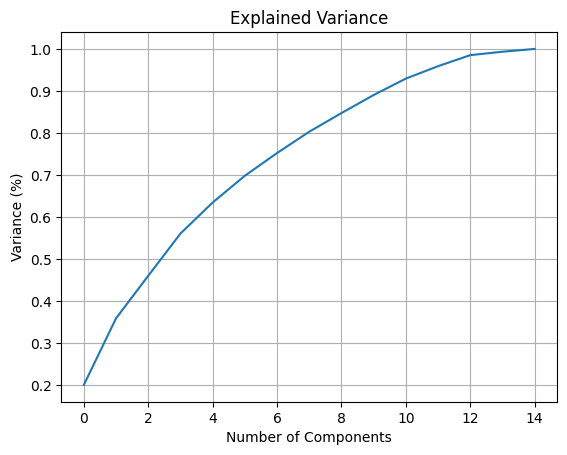

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
principalComponents = pca.fit_transform(scaled_df)
plt.figure()
# Compute cummulative sum of elements along a specific axis
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Explained Variance")
plt.grid(True)
plt.show()


From the diagram above, it can be seen that 9 principal components explain almost 90% of the variance in data and 11 principal components explain around 95% of the variance in data. So, instead of giving all the columns as input, we’d only feed these 9 principal components of the data to the machine learning algorithm and we’d obtain a similar result

In [17]:
pca = PCA(n_components=9)
pca_data = pca.fit_transform(scaled_df)
# This will be the new data fed to the algorithm.
pca_df = pd.DataFrame(data = pca_data, columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9',])
pca_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-0.448904,-1.654817,1.915708,2.568171,-0.771111,-0.921136,-0.253524,-0.094088,-0.006409
1,-0.083024,-2.082385,2.115798,2.340351,-0.702299,-0.863169,-0.492990,-0.102380,0.234204
2,-0.048442,-2.038013,2.277203,2.180293,-0.669501,-0.821882,-0.427053,-0.212518,0.220994
3,0.141329,-2.235114,2.175299,2.003601,-0.864159,-0.782308,-0.368065,-0.163866,0.028451
4,0.130497,-2.148416,1.942803,2.275605,-0.930918,-0.834101,-0.375160,0.010064,0.006831


This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

Pros of PCA:
- Overfitting is reduced.
- Helps in better visualizations
- Ability to handle noise

Cons of PCA:
- The resultant principal components are less interpretable than the original data
- Can lead to information loss if the explained variance threshold is not considered appropriately.

### Resources

- [Advance Feature Engineering](https://www.kaggle.com/code/seneralkan/advanced-feature-engineering)
- [Dataset](https://www.kaggle.com/CooperUnion/cardataset)